<a href="https://colab.research.google.com/github/Dayaanaly/SA-PU3-Modelo_recurrentes/blob/main/SA_PU3_Generador_texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica #3: Modelo para generación de texto**

*Centro Universitario de Ciencias Exactas e Ingenierías*

*División de Tecnologías para la Integración Ciber-Humana*

*Ingeniería Biomédica*

<br>

*Mtra. Sofía Alejandra Aguilar Valdez*

14 de octubre de 2022

## **Información del equipo**

```NOMBRES:```

Esteban Gómez Fuentes

Christopher William Sanchez Rodriguez

Dayana Analy Pacheco Bañuelos


```CÓDIGOS:```

217593587

217535226

215658088

```LINK REPOSITORIO:```
https://github.com/Dayaanaly/SA-PU3-Modelo_recurrentes



## **Contenido**



1.   Resumen
2.   Marco teórico
3.   Objetivos
4.   Materiales y métodos
5.   Resultados
6.   Discusión
7.   Conclusiones
8.   Referencias



# **1. Resumen**
Esta práctica consiste en la creación de una red neuronal recurrente (RNN) que sea capaz de procesar el texto del libro “Frankenstein” para utilizarlo como base de datos. En base a estos datos, el modelo debe de generar un párrafo de texto que en teoría debe de tener cierta relación con el contenido del libro. 

En cuanto a los resultados lo que se busca primordialmente es que el texto generado contenga palabras con coherencia y que formen parte de nuestro diccionario. La redacción, coherencia y lógica de este texto generado queda en un segundo plano, ya que esos son elementos un poco más complejos de obtener, y en cierta medida nuestro modelo de red no tiene forma de interpretar estos parámetros.

# **2. Marco teórico**
(300-800 palabras)

Una Red de Neuronas Artificial (RNA) es un modelo matemático de procesamiento, distribuido paralelamente, en forma de grafo dirigido, simulando el comportamiento biológico de las neuronas y la estructura del cerebro. 

Las Redes de Neuronas Recurrentes o en inglés, Recurrent Neural Networks (RNN) son modelos de redes de neuronas artificiales (RNAs), donde las conexiones entre unidades forman un ciclo dirigido. Específicamente, un ciclo dirigido es una secuencia en la que la caminata a lo largo de los vértices y bordes está completamente determinada por el conjunto de bordes utilizados y, por lo tanto, tiene una apariencia de un orden específico. Este tipo de redes neuronales está especializado en el procesamiento de datos secuenciales o series temporales como es el caso del reconocimiento de voz y escritura. 

![](https://www.simplilearn.com/ice9/free_resources_article_thumb/Simple_Recurrent_Neural_Network.png) 

Una RNN basada en caracteres y de esta manera también podemos usar el caso al mismo tiempo para mostrar el uso de datos de texto. En este ejemplo se entrena un modelo de red neuronal para predecir el siguiente carácter a partir de una secuencia de carácteres. Con este modelo intencionadamente simple, se consigue generar secuencias de texto más largas llamando al modelo repetidamente.

El reconocimiento de texto es una de las partes más importantes de una RNN, ya que partir de esta característica y la creatividad, podemos obtener la generación y de algún modo, puede ser considerada un paso previo.  

El texto se le conoce al conjunto de frases y palabras coherentes y ordenadas que permiten ser interpretadas y transmiten las ideas de un autor. Su extensión es variable y corresponde a un todo comprensible que tiene una finalidad comunicativa en un contexto dado.  

La generación se puede definir como la acción que consiste en producir o crear una cosa, y si la aplicamos a términos de la inteligencia artificial (IA), podría describirse como la capacidad de crear contenido indistinguible del aprendido (original) de manera global pero diferente a cada elemento de manera individual. Un ejemplo fácil en el campo de la visión Artificial sería poder “dibujar” un perro en un campo de hierba, habiendo visto únicamente campos de hierba y perros sobre arena por separado. Si juntáramos las tres imágenes en una misma carpeta, no se podría decir con certeza cuál de las tres ha sido generada por un sistema (ficticio) de creación de imágenes.  

Para la creación de texto gramaticalmente correcto en el mismo dominio del original de manera global, pero con diferente significado o contenido a cada uno de los textos de manera individual. Se quiere una técnica de generación de texto fácil de ajustar y que combine una técnica no compleja de clasificación con una búsqueda sobre las soluciones del anterior, consiguiendo la unión de diferentes datos secuenciales relativamente sencillos en un sistema de mayor complejidad.  
Un algoritmo de búsqueda debería ser capaz de encontrar posibles opciones para el modelo, es decir, generar nuevos contenidos (palabras) a partir de ello. 

# **3. Objetivos**
**Objetivo general:** Generar texto legible y coherente haciendo uso de una RNN, en base al texto del libro “Frankenstein.”

**Objetivos específicos:**
1. Hacer uso de una Red neuronal recurrente en base a la librería Pytorch.
2. Procesar el texto del libro “Frankenstein” de Mary Shelley, en formato .txt.
3. Obtener palabras coherentes y pertenecientes al idioma inglés.
4. Definir la importancia del tamaño de la red neuronal, y la importancia de las épocas para el texto generado.
5. Apreciar la calidad del texto generado por la red.
6. Definir si la red es víctima de underfitting o overfitting y el porqué de ello.


# **4. Materiales y métodos**

## *Materiales*

Los datos del set del libro de Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley [1]



## *Métodos*

Para realizar la RNN (Recurrent neuronal network)  que  sea capaz de generar texto a partir del data de un libro especifíco se implementó la siguiente metodología:

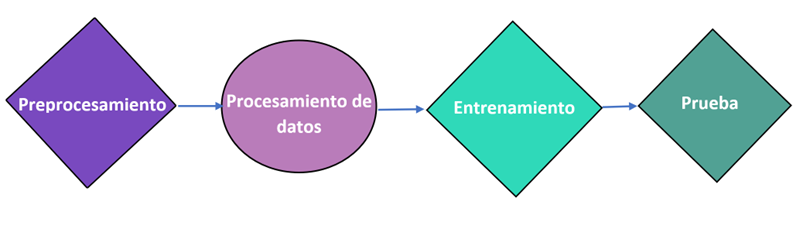

### Preprocesamiento de data (libro)

In [ ]:
import tensorflow as tf
import numpy as np
import os
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from string import punctuation

In [ ]:
import requests
content = requests.get("https://www.gutenberg.org/cache/epub/42324/pg42324.txt").text
open("data\Frankeinstein.txt", "w", encoding="utf-8").write(content)

465593

Definicion de los datos para el entrenamiento

In [ ]:
sequence_length = 100
BATCH_SIZE = 256
EPOCHS = 45
# dataset file path
FILE_PATH = "data\Frankeinstein.txt"
BASENAME = os.path.basename(FILE_PATH)
# read the data
text = open(FILE_PATH, encoding="utf-8").read()
# remove caps, comment this code if you want uppercase characters as well
#text = text.lower()
# remove punctuation
text = text.translate(str.maketrans("", "", punctuation))
#text = text.ascii_letters + " .,;'"

In [ ]:
# print some stats
n_chars = len(text)
vocab = ''.join(sorted(set(text)))
print("unique_chars:", vocab)
n_unique_chars = len(vocab)
print("Number of characters:", n_chars)
print("Number of unique characters:", n_unique_chars)

In [ ]:
# dictionary that converts characters to integers
char2int = {c: i for i, c in enumerate(vocab)}
# dictionary that converts integers to characters
int2char = {i: c for i, c in enumerate(vocab)}

In [ ]:
# save these dictionaries for later generation
pickle.dump(char2int, open(f"{BASENAME}-char2int.pickle", "wb"))
pickle.dump(int2char, open(f"{BASENAME}-int2char.pickle", "wb"))

In [ ]:
# convert all text into integers
encoded_text = np.array([char2int[c] for c in text])

In [ ]:
# construct tf.data.Dataset object
char_dataset = tf.data.Dataset.from_tensor_slices(encoded_text)

In [ ]:
# print first 5 characters
for char in char_dataset.take(8):
    print(char.numpy(), int2char[char.numpy()])

69 ﻿
31 T
45 h
42 e
1  
27 P
55 r
52 o


In [ ]:
# build sequences by batching
sequences = char_dataset.batch(2*sequence_length + 1, drop_remainder=True)

# print sequences
for sequence in sequences.take(2):
    print(''.join([int2char[i] for i in sequence.numpy()]))

﻿The Project Gutenberg EBook of Frankenstein by Mary W Shelley

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever  You may copy it give it away or
reuse
 it under the terms of the Project Gutenberg License included
with this eBook or online at wwwgutenbergorg


Title Frankenstein
       or The Modern Prometheus

Author Mary W Shelley

Release Date Marc


In [ ]:
def split_sample(sample):
    # example :
    # sequence_length is 10
    # sample is "python is a great pro" (21 length)
    # ds will equal to ('python is ', 'a') encoded as integers
    ds = tf.data.Dataset.from_tensors((sample[:sequence_length], sample[sequence_length]))
    for i in range(1, (len(sample)-1) // 2):
        # first (input_, target) will be ('ython is a', ' ')
        # second (input_, target) will be ('thon is a ', 'g')
        # third (input_, target) will be ('hon is a g', 'r')
        # and so on
        input_ = sample[i: i+sequence_length]
        target = sample[i+sequence_length]
        # extend the dataset with these samples by concatenate() method
        other_ds = tf.data.Dataset.from_tensors((input_, target))
        ds = ds.concatenate(other_ds)
    return ds

# prepare inputs and targets
dataset = sequences.flat_map(split_sample)

In [ ]:
def one_hot_samples(input_, target):
    # onehot encode the inputs and the targets
    # Example:
    # if character 'd' is encoded as 3 and n_unique_chars = 5
    # result should be the vector: [0, 0, 0, 1, 0], since 'd' is the 4th character
    return tf.one_hot(input_, n_unique_chars), tf.one_hot(target, n_unique_chars)

dataset = dataset.map(one_hot_samples)

In [ ]:
# print first 2 samples
for element in dataset.take(2):
    print("Input:", ''.join([int2char[np.argmax(char_vector)] for char_vector in element[0].numpy()]))
    print("Target:", int2char[np.argmax(element[1].numpy())])
    print("Input shape:", element[0].shape)
    print("Target shape:", element[1].shape)
    print("="*50, "\n")

Input: ﻿The Project Gutenberg EBook of Frankenstein by Mary W Shelley

This eBook is for the use of anyone 
Target: a
Input shape: (100, 70)
Target shape: (70,)

Input: The Project Gutenberg EBook of Frankenstein by Mary W Shelley

This eBook is for the use of anyone a
Target: n
Input shape: (100, 70)
Target shape: (70,)



In [ ]:
# repeat, shuffle and batch the dataset
ds = dataset.repeat().shuffle(1024).batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
pip install -U numpy==1.18.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.18.5 which is incompatible.
tensorflow 2.9.2 requires numpy>=1.20, but you have numpy 1.18.5 which is incompatible.
tables 3.7.0 requires numpy>=1.19.0, but you have numpy 1.18.5 which is incompatible.
plotnine 0.8.0 requires numpy>=1.19.0, but you have numpy 1.18.5 which is incompatible.
jaxlib 0.3.22+cuda11.cudnn805 requires numpy>=1.20, but you have numpy 1.18.5 which is incompatible.
jax 0.3.23 requires numpy>=1.20, but you have numpy 1.18.5 wh

In [ ]:
model = Sequential([
    LSTM(256, input_shape=(sequence_length, n_unique_chars), return_sequences=True),
    Dropout(0.3),
    LSTM(256),
    Dense(n_unique_chars, activation="softmax"),])

In [ ]:
model = Sequential([
    LSTM(256, input_shape=(sequence_length, n_unique_chars), return_sequences=True),
    Dropout(0.3),
    LSTM(256),
    Dense(n_unique_chars, activation="softmax"),])

In [ ]:
# define the model path
model_weights_path = f"results/{BASENAME}-{sequence_length}.h5"
model.summary()
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 256)          334848    
                                                                 
 dropout_1 (Dropout)         (None, 100, 256)          0         
                                                                 
 lstm_3 (LSTM)               (None, 256)               525312    
                                                                 
 dense_1 (Dense)             (None, 70)                17990     
                                                                 
Total params: 878,150
Trainable params: 878,150
Non-trainable params: 0
_________________________________________________________________


## Entrenamiento del modelo


In [ ]:
# make results folder if does not exist yet
if not os.path.isdir("results"):
    os.mkdir("results")
# train the model
model.fit(ds, steps_per_epoch=(len(encoded_text) - sequence_length) // BATCH_SIZE, epochs=EPOCHS)
# save the model
model.save(model_weights_path)

Epoch 1/45
1733/1733 [==============================] - 128s 70ms/step - loss: 2.2398 - accuracy: 0.3509
Epoch 2/45
1733/1733 [==============================] - 122s 70ms/step - loss: 1.7443 - accuracy: 0.4774
Epoch 3/45
1733/1733 [==============================] - 124s 72ms/step - loss: 1.5478 - accuracy: 0.5355
Epoch 4/45
1733/1733 [==============================] - 121s 70ms/step - loss: 1.4257 - accuracy: 0.5697
Epoch 5/45
1733/1733 [==============================] - 122s 70ms/step - loss: 1.3410 - accuracy: 0.5936
Epoch 6/45
1733/1733 [==============================] - 122s 70ms/step - loss: 1.2729 - accuracy: 0.6118
Epoch 7/45
1733/1733 [==============================] - 123s 71ms/step - loss: 1.2169 - accuracy: 0.6265
Epoch 8/45
1733/1733 [==============================] - 123s 71ms/step - loss: 1.1683 - accuracy: 0.6399
Epoch 9/45
1733/1733 [==============================] - 123s 71ms/step - loss: 1.1249 - accuracy: 0.6519
Epoch 10/45
1733/1733 [==============================] 

Carga de los datos para la fase de prueba

In [ ]:
import numpy as np
import pickle
import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Activation
import os

sequence_length = 100
# dataset file path
FILE_PATH = "/content/data\Frankeinstein.txt"
# FILE_PATH = "data/python_code.py"
BASENAME = os.path.basename(FILE_PATH)

In [ ]:
seed = "disconfort"

In [ ]:
# load vocab dictionaries
char2int = pickle.load(open(f"{BASENAME}-char2int.pickle", "rb"))
int2char = pickle.load(open(f"{BASENAME}-int2char.pickle", "rb"))
vocab_size = len(char2int)

In [ ]:
# building the model
model = Sequential([
    LSTM(256, input_shape=(sequence_length, vocab_size), return_sequences=True),
    Dropout(0.3),
    LSTM(256),
    Dense(vocab_size, activation="softmax"),])

In [ ]:
# load the optimal weights
model.load_weights(f"results/{BASENAME}-{sequence_length}.h5")

Prueba del modelo ( generación de texto)

In [ ]:
s = seed
n_chars = 800
# generate 400 characters
generated = ""
for i in tqdm.tqdm(range(n_chars), "Generating text"):
    # make the input sequence
    X = np.zeros((1, sequence_length, vocab_size))
    for t, char in enumerate(seed):
        X[0, (sequence_length - len(seed)) + t, char2int[char]] = 1
    # predict the next character
    predicted = model.predict(X, verbose=0)[0]
    # converting the vector to an integer
    next_index = np.argmax(predicted)
    # converting the integer to a character
    next_char = int2char[next_index]
    # add the character to results
    generated += next_char
    # shift seed and the predicted character
    seed = seed[1:] + next_char

print("Seed:", s)
print("Generated text:")
print(generated)

Generating text: 100%|██████████| 800/800 [00:35<00:00, 22.71it/s]

Seed:  my dear F
Generated text:
rankend it was the sun had been the streets of fine and the country and ignorable to me when the scene were invimated to my father I was for ever them but when I arrived in my countenance to the dæmon with the most grief that I about to discovered my dear Frankend it was the sun had been the streets of fine and the country and ignorable to me when the scene were invimated to my father I was for ever them but when I arrived in my countenance to the dæmon with the most grief that I about to discovered my dear Frankend it was the sun had been the streets of fine and the country and ignorable to me when the scene were invimated to my father I was for ever them but when I arrived in my countenance to the dæmon with the most grief that I about to discovered my dear Frankend it was the sun had be


# **5. Resultados**

###Texto generado:

rankend it was the sun had been the streets of fine and the country and ignorable to me when the scene were invimated to my father I was for ever them but when I arrived in my countenance to the dæmon with the most grief that I about to discovered my dear Frankend it was the sun had been the streets of fine and the country and ignorable to me when the scene were invimated to my father I was for ever them but when I arrived in my countenance to the dæmon with the most grief that I about to discovered my dear Frankend it was the sun had been the streets of fine and the country and ignorable to me when the scene were invimated to my father I was for ever them but when I arrived in my countenance to the dæmon with the most grief that I about to discovered my dear Frankend it was the sun had be


###Evaluación en grammarly 
El texto generado fue llevado a la platarforma de *Speeling* grammarly donde se evaluo su calidad legilidad entre otros parametros
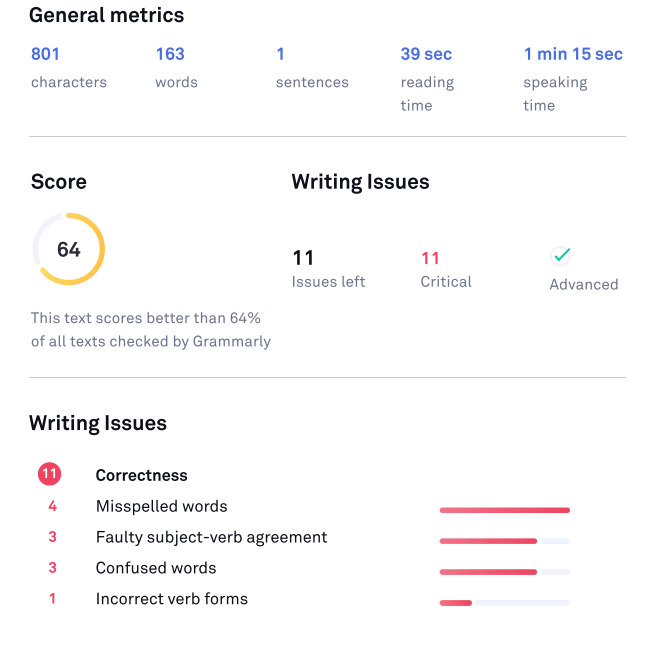

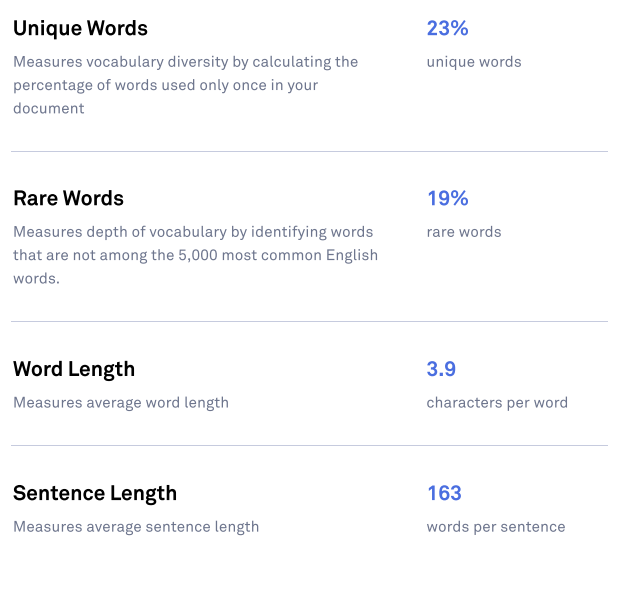

###Evaluación en DeepL 
A su vez el texto fue llevado a la plataforma de traducción *DeepL translate* en donde se busco visualizar que tan coherente queda el texto luego de pasar por una traducción, soltando el siguiente resultado en texto. 

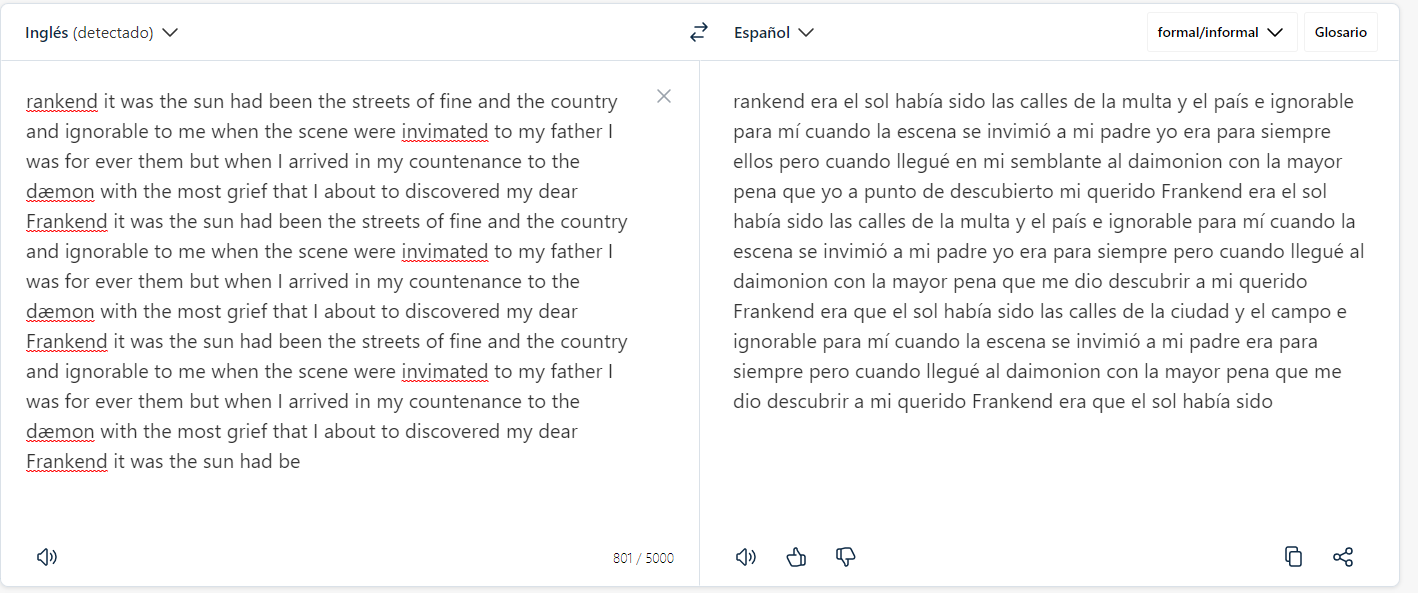

# **6. Discusión**
El modelo RNN generador de texto, busca encontrar y recordar información de time steps ya que el efecto del número de capas internas que una red neuronal recurrente requiere estar relacionado con la salida de la capa en un time step concreto, que está determinada por los datos de entrada que la capa ha visto hasta ese momento. 

De esta forma la RNN pueda realizar predicciones de lo que sucederá o generará en un futuro, que serían palabras o en el mejor de los casos oraciones coherentes y entendibles en el lenguaje humano a partir de los datos del set del libro de Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley, con el fin de que el texto del libro sea procesado y pueda recordarlo para así asociar conceptos con las nuevas frases que va analizando porque ya las ha “visto”.

Para el modelo se utilizó un tamaño de batch de 256 y se entrenó por primero 30 y al final 45 épocas. Y solo de esta ultima forma demostró un mejor trabajo de la red en el entrenamiento y la fase de prueba con un 76.87% de eficiencia del modelo, además se utilizó para los vectores obtenidos la codificación One-hot Encoding. Dando como resultado texto en inglés.

Es importante mencionar que el texto que se genera no contiene signos de puntuación, por que como se busco que arrojará texto en inglés, ya que se sabe que el inglés no tiene acentos, y por otro lado se quitaron los puntos y comas debido a que implicaría enseñarle aparte al programa a identificar cada cuando tiene que terminar parcialmente una idea. Es probable se habría confundido en la prueba y por eso optamos por quitarlos, ya que no afectaban al resultado de  producir texto en inglés que su composicion fuera entendible.
Para verificar la composición del texto que tan bueno era en coherencia o congruencia, lo corroboramos en Grammarly, obtuvimos 11 de 163 palabras con error además de una coherencia medianamente clara con un score del 64%.         

En este modelo no se presento tener demasiada información de sus datos y/o conocimientos previos (overfitting), sin embargo, sí nuestros datos de entrenamiento son muy pocos nuestra máquina no será capaz de generalizar el conocimiento y por eso se genera algo de underfitting, el cual se pudiera cambiar si agregamos aun más especificaciones para la data set del libro de Frankenstein o resúmenes de otros libros similares, para que la arquitectura pueda asimilar mas palabras y asociarlas.

En comparación con otras literaturas asociadas ([2],[3],[4]), una gran diferencia se puede notar en las épocas que utilizaban en el entrenamiento, algunas utilizan 100, 200, 80 cuando mínimo, pero nuestro modelo con 30 y 45 con las que fue probado, funciona bien y logra su objetivo principal. Otra de las diferencias es que la capacidad clasificación de su modelo automático es además capaz de discernir correctamente entre texto con coherencia y cohesión.
Lo cual sería interesante poder agregarle al nuestro alguna función de clasificación.

El modelo finalmente tiene algunos detalles y se le podrían agregar mas cosas para lograr una exactitud mas precisa al momento de generar palabras. Sin embargo, los resultados son satisfactorios, porque el texto generado es principalmente legible.



# **7. Conclusiones**
El modelo ha generado texto, sin embargo, este no cuenta con ciertas condiciones que nos gustaría que obtuviera. Una de ellas es la coherencia del texto, ya que este realiza saltos de línea los cuales desconocemos su causa, además de ser un tanto repetitivo con el texto generado, se puede apreciar como este repite ciertas palabras como *”smiled”* o *”friends”*. 

Otro punto importante, es la calidad del texto, ya que este genera palabras existentes en el vocablo inglés, sin embargo, hay un pequeño porcentaje de palabras las cuales no son palabras que se utilicen normalmente, sin embargo, es posible inferir a que palabra intentan asemejarse. Esto con un entrenamiento de 45 épocas, por ende, un accuracy del 76.87%.

 Nos gustaría probar un preprocesamiento y procesamiento de los datos un tanto más profundo (entre 100 y 200 épocas) para aumentar el accuracy que tiene el procesamiento con respecto al texto que se ha introducido, esto con el propósito de analizar el texto generado y si es que mejora su calidad de redacción y coherencia entre palabras.



# **8. Referencias**

[1] Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley. (1818). Project Gutenberg. Recuperado 8 de octubre de 2022, de https://www.gutenberg.org/ebooks/42324

[2] Verdú Ruíz, Claudio  (2019).  Generador heurístico de textos inteligentes.  Proyecto Fin de Carrera / Trabajo Fin de Grado, E.T.S.I. de Sistemas Informáticos (UPM) <https://oa.upm.es/view/institution/ETSI=5FSistemas=5FInfor/>, Madrid.   

[3] Pérez Guerrero, J. (2020, junio). REDES RECURRENTES. TFG DGMyE Pérez Guerrero, Jesús.pdf. Recuperado 17 de octubre de 2022, de https://idus.us.es/bitstream/handle/11441/115230/TFG%20DGMyE%20P%C3%A9rez%20Guerrero%2C%20Jes%C3%BAs.pdf?sequence=1&isAllowed=y

[4] Torres, J. (2021, 22 marzo). Redes Neuronales Recurrentes. Jordi TORRES.AI. Recuperado 20 de octubre de 2022, de https://torres.ai/redes-neuronales-recurrentes/